In [1]:
# initial solution 
import numpy as np 
import igraph as ig
import random
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
from random import randrange
import pandas as pd
from collections import deque
from random import randrange

## Generate Random graph using library

## Generate random graph , control the number of nodes created 

[[0 0 0 1 1 0 1 1 1 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0]
 [1 0 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 1 0 1 0]
 [0 1 0 0 0 0 0 1 0 0]
 [1 0 1 1 1 0 0 0 0 1]
 [1 1 1 1 0 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]
5


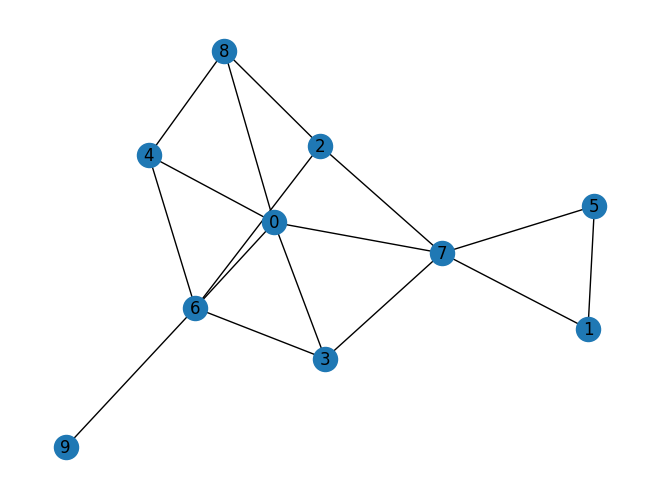

In [4]:
N=10
num_ones=35
def generate_matrix(N,num_ones):
    arr = np.zeros([N,N], dtype=int)
    idx1 = np.random.choice(range(N), num_ones)
    idx2 = np.random.choice(range(N), num_ones)
    arr[idx1,idx2] = 1
    arr ^= arr.T
    np.fill_diagonal(arr,0)
    return arr
graph = generate_matrix(N,num_ones)
print(graph)
G=nx.from_numpy_matrix(graph)
nx.draw(G,with_labels=True)
degrees = [val for (node, val) in G.degree()]
print(max(degrees))
K=max(degrees)

### Create random solution for graph G 

In [5]:

#set colors 
colors = list(range(4))
# solution is a map of nodes to colors
# Generate a random solution:
solution = dict()
for i in range(len(graph)):
    solution[i] = colors[randrange(0, len(colors))]

print(solution)

{0: 2, 1: 2, 2: 1, 3: 3, 4: 3, 5: 0, 6: 0, 7: 3, 8: 0, 9: 1}


### Try fitness function for a given graph : 'G' , and a random solution : "solution'

In [6]:
# fitness function

def fitness (nx_graph , solution ) : 
    # Count niterationsode pairs (i,j) which are adjacent and have the same color.
    
    graph = nx.to_numpy_matrix(nx_graph).astype(int).tolist()
    move_candidates = set()  # use a set to avoid duplicates
    degrees = [val for (node, val) in nx_graph.degree()] # get list of degree for each nodes 

    conflict_count = 0
    for i in range(len(graph)):
        for j in range(i+1, len(graph)):  # assume undirected graph, ignoring self-loops
            if graph[i][j] > 0: # adjacent ( connected) 
                if solution[i] == solution[j]:  # same color (dictionnary same value) 
                    move_candidates.add(i)
                    move_candidates.add(j)
                    conflict_count += 1 * (degrees[i] +degrees[j])
    move_candidates = list(move_candidates)  # convert to list for array indexing

    if conflict_count == 0:
        return conflict_count,move_candidates
        # Found a valid coloring.
    print('The fitness value for the solution {} is {} '.format(solution,conflict_count))
    return conflict_count,move_candidates

move_candidates=fitness(G , solution)[1]


The fitness value for the solution {0: 2, 1: 2, 2: 1, 3: 3, 4: 3, 5: 0, 6: 0, 7: 3, 8: 0, 9: 1} is 8 


## Generate neighbor solutions

In [7]:
# Generate neighbor solutions.
def new_neighbor_solutions(solution,colors,move_candidates):
    new_solution = None
    # Choose a node to move.
    node = move_candidates[randrange(0, len(move_candidates))]
    print(node)

    # Choose color other than current.
    new_color = colors[randrange(0, len(colors) - 1)]
    if solution[node] == new_color:
        # essentially swapping last color with current color for this calculation
        new_color = colors[-1]

    # Create a neighbor solution
    new_solution = solution.copy()
    new_solution[node] = new_color
    print("here is a new neighbor_solutions : {} of the previous one : {}" .format(new_solution,solution))
    return 

new_neighbor_solutions(solution,colors,move_candidates)

7
here is a new neighbor_solutions : {0: 2, 1: 2, 2: 1, 3: 3, 4: 3, 5: 0, 6: 0, 7: 2, 8: 0, 9: 1} of the previous one : {0: 2, 1: 2, 2: 1, 3: 3, 4: 3, 5: 0, 6: 0, 7: 3, 8: 0, 9: 1}


# Implement Tabu search , and set up aspiration criteria

16 -> 10
10 -> 4
4 -> 0
Found coloring:
 {0: 1, 1: 1, 2: 4, 3: 4, 4: 2, 5: 4, 6: 3, 7: 3, 8: 0, 9: 1}


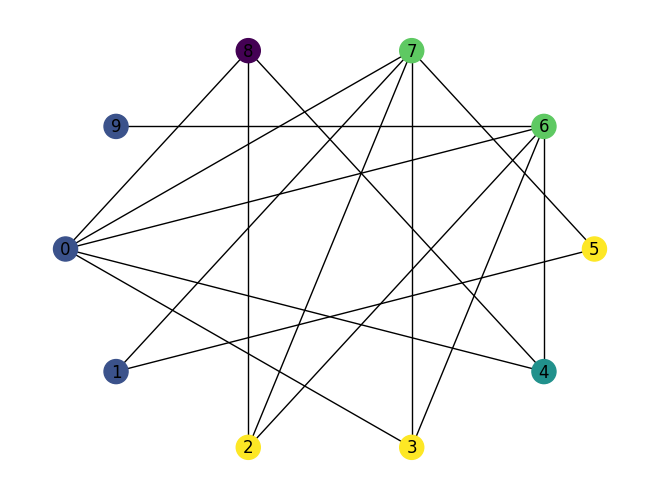

In [8]:
from collections import deque
from random import randrange
# list for plotting 
x=[]
y=[]
z=[]

def tabucol(graph, number_of_colors, tabu_size=7, reps=100, max_iterations=5000, debug=False):
    # graph is assumed to be the adjacency matrix of an undirected graph with no self-loops
    # nodes are represented with indices, [0, 1, ..., n-1]
    # colors are represented by numbers, [0, 1, ..., k-1]
    degrees = [val for (node, val) in G.degree()] # get list of degree for each nodes 
    colors = list(range(number_of_colors))
    # number of iterations of the tabucol algorithm
    iterations = 0
    # initialize tabu as empty queue
    tabu = deque()
    
    # solution is a map of nodes to colors
    # Generate a random solution:
    solution = dict()
    for i in range(len(graph)):
        solution[i] = colors[randrange(0, len(colors))]

    # Aspiration level A(z), represented by a mapping: f(s) -> best f(s') seen so far
    aspiration_level = dict()

    while iterations < max_iterations:
        
        # Count node pairs (i,j) which are adjacent and have the same color.
        move_candidates = set()  # use a set to avoid duplicates
        conflict_count = 0

        for i in range(len(graph)):
            for j in range(i+1, len(graph)):  # assume undirected graph, ignoring self-loops
                if graph[i][j] > 0: # adjacent
                    if solution[i] == solution[j]:  # same color
                        move_candidates.add(i)
                        move_candidates.add(j)
                        conflict_count += 1 * ( degrees [i] + degrees [j])

        move_candidates = list(move_candidates)  # convert to list for array indexing

        if conflict_count == 0:
            # Found a valid coloring.
            break

        # Generate neighbor solutions.
        new_solution = None
        for r in range(reps):
            # Choose a node to move.
            node = move_candidates[randrange(0, len(move_candidates))]
            
            # Choose color other than current.
            new_color = colors[randrange(0, len(colors) - 1)]
            if solution[node] == new_color:
                # essentially swapping last color with current color for this calculation
                new_color = colors[-1]

            # Create a neighbor solution
            new_solution = solution.copy()
            new_solution[node] = new_color
            # Count adjacent pairs with the same color in the new solution.
            new_conflicts = 0
            for i in range(len(graph)):
                for j in range(i+1, len(graph)):
                    if graph[i][j] > 0 and new_solution[i] == new_solution[j]:
                        new_conflicts += 1 * ( degrees [i] + degrees [j])
            if new_conflicts < conflict_count:  # found an improved solution
                # if f(s') <= A(f(s)) [where A(z) defaults to z - 1]
                if new_conflicts <= aspiration_level.setdefault(conflict_count, conflict_count - 1):
                    # set A(f(s) = f(s') - 1
                    aspiration_level[conflict_count] = new_conflicts - 1

                    if (node, new_color) in tabu: # permit tabu move if it is better any prior
                        tabu.remove((node, new_color))
                        if debug:
                            print("tabu permitted;", conflict_count, "->", new_conflicts)
                        break
                else:
                    if (node, new_color) in tabu:
                        # tabu move isn't good enough
                        continue
                if debug:
                    print (conflict_count, "->", new_conflicts)
                break

        # At this point, either found a better solution,
        # or ran out of reps, using the last solution generated
        
        # The current node color will become tabu.
        # add to the end of the tabu queue
        tabu.append((node, solution[node]))
        if len(tabu) > tabu_size:  # queue full
            tabu.popleft()  # remove the oldest move

        # Move to next iteration of tabucol with new solution
        solution = new_solution



        iterations += 1
        x.append(iterations)
        y.append(conflict_count)
        z.append(new_conflicts)




        if debug and iterations % 500 == 0:
            print("iteration:", iterations)

    #print("Aspiration Levels:\n" + "\n".join([str((k,v)) for k,v in aspiration_level.items() if k-v > 1]))

    # At this point, either conflict_count is 0 and a coloring was found,
    # or ran out of iterations with no valid coloring.
    if conflict_count != 0:
        print("No coloring found with {} colors.".format(number_of_colors))
        return None
    else:
        print("Found coloring:\n", solution)
        
        return solution

try:
    import matplotlib.pyplot as plt
    import networkx as nx
                
    def Tabu_fitness1(nx_graph, k, draw=False):
        graph = nx.to_numpy_matrix(nx_graph).astype(int).tolist()
        coloring = tabucol(graph, k, debug=True)
        if draw:
            values = [coloring[node] for node in nx_graph]
            nx.draw(nx_graph, node_color=values, pos=nx.shell_layout(nx_graph),with_labels=True)
            plt.show()
except ImportError:
    print("Need networkx and matplotlib installed for testing.")

Tabu_fitness1(G, K, True)

## Implement Tabu search using improved fitness function 

[0, 1, 2, 3, 4]
3 -> 2
2 -> 1
1 -> 0
Found coloring:
 {0: 3, 1: 1, 2: 3, 3: 0, 4: 0, 5: 3, 6: 1, 7: 2, 8: 4, 9: 2}


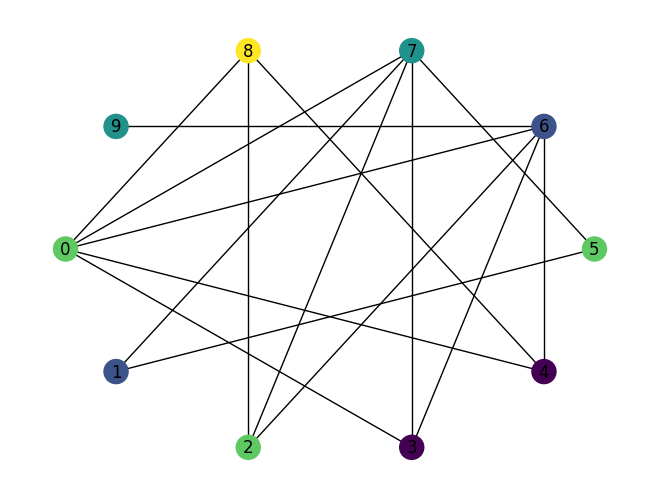

In [9]:
# list for plotting 
x=[]
y=[]
z=[]

def tabucol(graph, number_of_colors, tabu_size=7, reps=100, max_iterations=500, debug=False):
    # graph is assumed to be the adjacency matrix of an undirected graph with no self-loops
    # nodes are represented with indices, [0, 1, ..., n-1]
    # colors are represented by numbers, [0, 1, ..., k-1]
    colors = list(range(number_of_colors))
    print(colors)
    # number of iterations of the tabucol algorithm
    iterations = 0
    # initialize tabu as empty queue
    tabu = deque()
    
    # solution is a map of nodes to colors
    # Generate a random solution:
    solution = dict()
    for i in range(len(graph)):
        solution[i] = colors[randrange(0, len(colors))]

    # Aspiration level A(z), represented by a mapping: f(s) -> best f(s') seen so far
    aspiration_level = dict()

    while iterations < max_iterations:
        
        # Count node pairs (i,j) which are adjacent and have the same color.
        move_candidates = set()  # use a set to avoid duplicates
        conflict_count = 0

        for i in range(len(graph)):
            for j in range(i+1, len(graph)):  # assume undirected graph, ignoring self-loops
                if graph[i][j] > 0: # adjacent
                    if solution[i] == solution[j]:  # same color
                        move_candidates.add(i)
                        move_candidates.add(j)
                        conflict_count += 1 

        move_candidates = list(move_candidates)  # convert to list for array indexing

        if conflict_count == 0:
            # Found a valid coloring.
            break

        # Generate neighbor solutions.
        new_solution = None
        for r in range(reps):
            # Choose a node to move.
            node = move_candidates[randrange(0, len(move_candidates))]
            
            # Choose color other than current.
            new_color = colors[randrange(0, len(colors) - 1)]
            if solution[node] == new_color:
                # essentially swapping last color with current color for this calculation
                new_color = colors[-1]

            # Create a neighbor solution
            new_solution = solution.copy()
            new_solution[node] = new_color
            # Count adjacent pairs with the same color in the new solution.
            new_conflicts = 0
            for i in range(len(graph)):
                for j in range(i+1, len(graph)):
                    if graph[i][j] > 0 and new_solution[i] == new_solution[j]:
                        new_conflicts += 1
            if new_conflicts < conflict_count:  # found an improved solution
                # if f(s') <= A(f(s)) [where A(z) defaults to z - 1]
                if new_conflicts <= aspiration_level.setdefault(conflict_count, conflict_count - 1):
                    # set A(f(s) = f(s') - 1
                    aspiration_level[conflict_count] = new_conflicts - 1

                    if (node, new_color) in tabu: # permit tabu move if it is better any prior
                        tabu.remove((node, new_color))
                        if debug:
                            print("tabu permitted;", conflict_count, "->", new_conflicts)
                        break
                else:
                    if (node, new_color) in tabu:
                        # tabu move isn't good enough
                        continue
                if debug:
                    print (conflict_count, "->", new_conflicts)
                break

        # At this point, either found a better solution,
        # or ran out of reps, using the last solution generated
        
        # The current node color will become tabu.
        # add to the end of the tabu queue
        tabu.append((node, solution[node]))
        if len(tabu) > tabu_size:  # queue full
            tabu.popleft()  # remove the oldest move

        # Move to next iteration of tabucol with new solution
        solution = new_solution



        iterations += 1
        x.append(iterations)
        y.append(conflict_count)
        z.append(new_conflicts)




        if debug and iterations % 500 == 0:
            print("iteration:", iterations)

    #print("Aspiration Levels:\n" + "\n".join([str((k,v)) for k,v in aspiration_level.items() if k-v > 1]))

    # At this point, either conflict_count is 0 and a coloring was found,
    # or ran out of iterations with no valid coloring.
    if conflict_count != 0:
        print("No coloring found with {} colors.".format(number_of_colors))
        return None
    else:
        print("Found coloring:\n", solution)
        
        return solution

try:
    import matplotlib.pyplot as plt
    import networkx as nx
                
    def Tabu_fitness2(nx_graph, k, draw=False):
        graph = nx.to_numpy_matrix(nx_graph).astype(int).tolist()
        coloring = tabucol(graph, k, debug=True)
        if draw:
            values = [coloring[node] for node in nx_graph]
            nx.draw(nx_graph, node_color=values ,with_labels=True,pos=nx.shell_layout(nx_graph))
            plt.show()
except ImportError:
    print("Need networkx and matplotlib installed for testing.")

Tabu_fitness2(G, K, True)

# Try 100 run with  10 nodes : 30 edges  

### Generate graph : 

9
Graph with 10 nodes and 30 edges


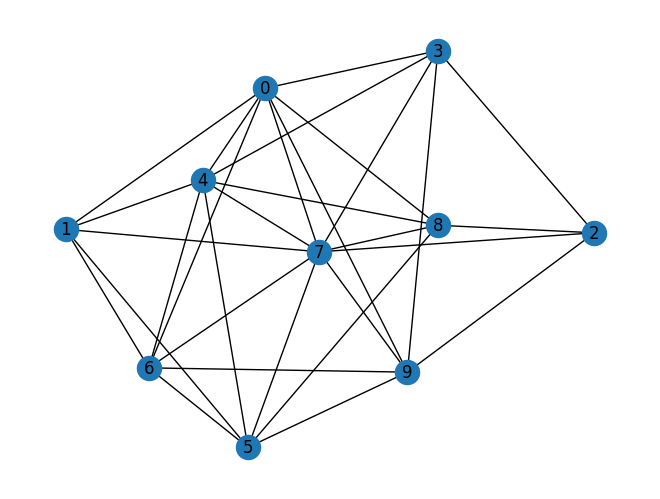

In [11]:
N=10
num_ones=30
def create_graph(N,nb_edges):
    g = ig.Graph()
    g.add_vertices(N)

    ## Now generate random edges
    RandEdges = []
    while len(RandEdges) < nb_edges:
        RandEdge = random.sample(range(N), 2)
        rev_RandEdge = [RandEdge[1],RandEdge[0]]
        if RandEdge not in RandEdges and rev_RandEdge not in RandEdges:
            RandEdges.append(RandEdge)
    g.add_edges(RandEdges)
    # ig.plot(g)
    # print(g1)
    return g

graph = create_graph(N,num_ones)

# transform igraph into networkx graph

A = graph.get_edgelist()
G = nx.DiGraph(A) # In case your graph is directed
G = nx.Graph(A) # In case you graph is undirected

nx.draw(G,with_labels=True)
degrees = [val for (node, val) in G.degree()]
print(max(degrees))
K=max(degrees)
print(G)



#### Run Fitness 1 

In [12]:
storage=0
minimum=[]
x=[]
y=[]
z=[]
for i in range ( 0,100):
    Tabu_fitness1(G, K, False)
    #Tabu_fitness2(G, K, False)
    #plt.figure(figsize=(8, 4))
    #plt.plot(x, z, linewidth=1)
    #plt.xlabel("iteration")
    #plt.ylabel("Fitness")
    #plt.title("Fitness value after " + str(x[-1]) + "th iteration")
    #plt.show()
    #plt.close()
    storage+=max(x)
    minimum.append(x[-1])  
    


[0, 1, 2, 3, 4, 5, 6, 7, 8]
4 -> 3
3 -> 2
2 -> 1
1 -> 0
Found coloring:
 {0: 6, 1: 1, 2: 7, 3: 0, 4: 8, 5: 4, 6: 2, 7: 8, 8: 3, 9: 8}
[0, 1, 2, 3, 4, 5, 6, 7, 8]
2 -> 1
1 -> 0
Found coloring:
 {0: 4, 1: 1, 2: 8, 3: 5, 4: 8, 5: 2, 6: 3, 7: 2, 8: 7, 9: 6}
[0, 1, 2, 3, 4, 5, 6, 7, 8]
6 -> 5
5 -> 3
3 -> 2
2 -> 1
1 -> 0
Found coloring:
 {0: 8, 1: 5, 2: 3, 3: 2, 4: 6, 5: 0, 6: 6, 7: 7, 8: 1, 9: 6}
[0, 1, 2, 3, 4, 5, 6, 7, 8]
3 -> 2
2 -> 1
1 -> 0
Found coloring:
 {0: 6, 1: 1, 2: 6, 3: 8, 4: 7, 5: 4, 6: 7, 7: 5, 8: 0, 9: 7}
[0, 1, 2, 3, 4, 5, 6, 7, 8]
4 -> 3
3 -> 2
2 -> 1
1 -> 0
Found coloring:
 {0: 7, 1: 2, 2: 1, 3: 8, 4: 6, 5: 1, 6: 6, 7: 4, 8: 3, 9: 4}
[0, 1, 2, 3, 4, 5, 6, 7, 8]
3 -> 2
2 -> 1
1 -> 0
Found coloring:
 {0: 8, 1: 7, 2: 4, 3: 2, 4: 6, 5: 3, 6: 6, 7: 0, 8: 4, 9: 1}
[0, 1, 2, 3, 4, 5, 6, 7, 8]
4 -> 3
3 -> 2
2 -> 1
1 -> 0
Found coloring:
 {0: 7, 1: 8, 2: 1, 3: 4, 4: 0, 5: 6, 6: 7, 7: 8, 8: 6, 9: 2}
[0, 1, 2, 3, 4, 5, 6, 7, 8]
1 -> 0
Found coloring:
 {0: 7, 1: 3, 2: 1, 3: 6, 4: 4, 

In [13]:
print('mean number of iteration is :',sum(minimum)/100)
print('minimum iteration is :' , min(minimum))

mean number of iteration is : 2.97
minimum iteration is : 1


In [ ]:
### Get mean number of iteration for 100 run ,for FITNESS 

In [ ]:
storage=0
minimum=[]
x=[]
y=[]
z=[]
for i in range ( 0,100):
    #Tabu_fitness1(G, K, False)
    Tabu_fitness2(G, K, False)
    #plt.figure(figsize=(8, 4))
    #plt.plot(x, z, linewidth=1)
    #plt.xlabel("iteration")
    #plt.ylabel("Fitness")
    #plt.title("Fitness value after " + str(x[-1]) + "th iteration")
    #plt.show()
    #plt.close()
    storage+=max(x)
    minimum.append(x[-1])  
    
    
    

In [ ]:
print('mean number of iteration is :',sum(minimum)/100)
print('minimum iteration is :' , min(minimum))

# Try Fitness number 2 , for  100 run with  100 nodes : 500 edges  

In [ ]:
N=100
num_ones=500
def create_graph(N,nb_edges):
    g = ig.Graph()
    g.add_vertices(N)

    ## Now generate random edges
    RandEdges = []
    while len(RandEdges) < nb_edges:
        RandEdge = random.sample(range(N), 2)
        rev_RandEdge = [RandEdge[1],RandEdge[0]]
        if RandEdge not in RandEdges and rev_RandEdge not in RandEdges:
            RandEdges.append(RandEdge)
    g.add_edges(RandEdges)
    # ig.plot(g)
    # print(g1)
    return g

graph = create_graph(N,num_ones)

# transform igraph into networkx graph

A = graph.get_edgelist()
G = nx.DiGraph(A) # In case your graph is directed
G = nx.Graph(A) # In case you graph is undirected

nx.draw(G,with_labels=True)
degrees = [val for (node, val) in G.degree()]
print(max(degrees))
K=max(degrees)
print(G)


In [ ]:
storage=0
minimum=[]
x=[]
y=[]
z=[]
for i in range ( 0,100):
    #Tabu_fitness1(G, K, False)
    #plt.figure(figsize=(8, 4))
    #plt.plot(x, z, linewidth=1)
    #plt.xlabel("iteration")
    #plt.ylabel("Fitness")
    #plt.title("Fitness value after " + str(x[-1]) + "th iteration")
    #plt.show()
    #plt.close()
    storage+=max(x)
    minimum.append(x[-1])  
    
    


In [ ]:
print('mean number of iteration is :',sum(minimum)/100)
print('minimum iteration is :' , min(minimum))

#### Fitness 2 , 100 run for 1000 nodes 5000 edges 

In [ ]:
N=1000
num_ones=5000
def create_graph(N,nb_edges):
    g = ig.Graph()
    g.add_vertices(N)

    ## Now generate random edges
    RandEdges = []
    while len(RandEdges) < nb_edges:
        RandEdge = random.sample(range(N), 2)
        rev_RandEdge = [RandEdge[1],RandEdge[0]]
        if RandEdge not in RandEdges and rev_RandEdge not in RandEdges:
            RandEdges.append(RandEdge)
    g.add_edges(RandEdges)
    # ig.plot(g)
    # print(g1)
    return g

graph = create_graph(N,num_ones)

# transform igraph into networkx graph

A = graph.get_edgelist()
G = nx.DiGraph(A) # In case your graph is directed
G = nx.Graph(A) # In case you graph is undirected

nx.draw(G,with_labels=True)
degrees = [val for (node, val) in G.degree()]
print(max(degrees))
K=max(degrees)
print(G)


In [ ]:
storage=0
minimum=[]
x=[]
y=[]
z=[]
for i in range ( 0,100):
    Tabu_fitness1(G, K, False)
    plt.figure(figsize=(8, 4))
    plt.plot(x, z, linewidth=1)
    plt.xlabel("iteration")
    plt.ylabel("Fitness")
    plt.title("Fitness value after " + str(x[-1]) + "th iteration")
    plt.show()
    storage+=max(x)
    minimum.append(x[-1])

In [ ]:
#print(x)
print(storage/100)
print(min(minimum))
print(sum(minimum)/100)


### Fitness 1 ,100 run for 10 nodes and 30 edges 

In [ ]:
N=10
num_ones=30
def create_graph(N,nb_edges):
    g = ig.Graph()
    g.add_vertices(N)

    ## Now generate random edges
    RandEdges = []
    while len(RandEdges) < nb_edges:
        RandEdge = random.sample(range(N), 2)
        rev_RandEdge = [RandEdge[1],RandEdge[0]]
        if RandEdge not in RandEdges and rev_RandEdge not in RandEdges:
            RandEdges.append(RandEdge)
    g.add_edges(RandEdges)
    # ig.plot(g)
    # print(g1)
    return g

graph = create_graph(N,num_ones)

# transform igraph into networkx graph

A = graph.get_edgelist()
G = nx.DiGraph(A) # In case your graph is directed
G = nx.Graph(A) # In case you graph is undirected

nx.draw(G,with_labels=True)
degrees = [val for (node, val) in G.degree()]
print(max(degrees))
K=max(degrees)
print(G)

In [ ]:
storage=0
minimum=[]
x=[]
y=[]
z=[]
for i in range ( 0,100):
    test(G, K, False)
    plt.figure(figsize=(8, 4))
    plt.plot(x, z, linewidth=1)
    plt.xlabel("iteration")
    plt.ylabel("Fitness")
    plt.title("Fitness value after " + str(x[-1]) + "th iteration")
    plt.show()
    storage+=max(x)
    minimum.append(x[-1])

In [ ]:
#print(x)
print(storage/100)
print(min(minimum))

print(sum(minimum)/100)

In [ ]:
### Fitness 1 ,100 run for 100 nodes and 500 edges 

In [ ]:
N=100
num_ones=500
def create_graph(N,nb_edges):
    g = ig.Graph()
    g.add_vertices(N)

    ## Now generate random edges
    RandEdges = []
    while len(RandEdges) < nb_edges:
        RandEdge = random.sample(range(N), 2)
        rev_RandEdge = [RandEdge[1],RandEdge[0]]
        if RandEdge not in RandEdges and rev_RandEdge not in RandEdges:
            RandEdges.append(RandEdge)
    g.add_edges(RandEdges)
    # ig.plot(g)
    # print(g1)
    return g

graph = create_graph(N,num_ones)

# transform igraph into networkx graph

A = graph.get_edgelist()
G = nx.DiGraph(A) # In case your graph is directed
G = nx.Graph(A) # In case you graph is undirected

nx.draw(G,with_labels=True)
degrees = [val for (node, val) in G.degree()]
print(max(degrees))
K=max(degrees)
print(G)

In [ ]:
storage=0
minimum=[]
x=[]
y=[]
z=[]
for i in range ( 0,100):
    test(G, K, False)
    plt.figure(figsize=(8, 4))
    plt.plot(x, z, linewidth=1)
    plt.xlabel("iteration")
    plt.ylabel("Fitness")
    plt.title("Fitness value after " + str(x[-1]) + "th iteration")
    plt.show()
    storage+=max(x)
    minimum.append(x[-1])

In [ ]:
#print(x)
print(storage/100)
print(min(minimum))

print(sum(minimum)/100)

In [ ]:
N=1000
num_ones=5000
def create_graph(N,nb_edges):
    g = ig.Graph()
    g.add_vertices(N)

    ## Now generate random edges
    RandEdges = []
    while len(RandEdges) < nb_edges:
        RandEdge = random.sample(range(N), 2)
        rev_RandEdge = [RandEdge[1],RandEdge[0]]
        if RandEdge not in RandEdges and rev_RandEdge not in RandEdges:
            RandEdges.append(RandEdge)
    g.add_edges(RandEdges)
    # ig.plot(g)
    # print(g1)
    return g

graph = create_graph(N,num_ones)

# transform igraph into networkx graph

A = graph.get_edgelist()
G = nx.DiGraph(A) # In case your graph is directed
G = nx.Graph(A) # In case you graph is undirected

nx.draw(G,with_labels=True)
degrees = [val for (node, val) in G.degree()]
print(max(degrees))
K=max(degrees)
print(G)

In [ ]:
storage=0
minimum=[]
x=[]
y=[]
z=[]
for i in range ( 0,100):
    test(G, K, False)
    plt.figure(figsize=(8, 4))
    plt.plot(x, z, linewidth=1)
    plt.xlabel("iteration")
    plt.ylabel("Fitness")
    plt.title("Fitness value after " + str(x[-1]) + "th iteration")
    plt.show()
    storage+=max(x)
    minimum.append(x[-1])

In [ ]:
#print(x)
print(storage/100)
print(min(minimum))

print(sum(minimum)/100)

In [ ]:
# barplot 
y = [first_fitness,improve_fitness]
x= ('fitness (1) ' , 'fitness (2)' )
y_pos = np.arange(len(x))

# Create bars
plt.bar(y_pos, y)

# Create names on the x-axis
plt.xticks(y_pos, x)
plt.title('Mean of generation needed over 1000 run ')
plt.xlabel('categories')
plt.ylabel('Generation')
 

# Show graphic
plt.show()

In [ ]:
# aspiration_level = dict()

#aspiration_level.setdefault(3, 3 - 1)
print(aspiration_level)
# tabu=deque()
#print(type(tabu))
#print(solution)
#node =2
#solution[node]
# tabu.append((node, solution[node]))
# print(tabu)
#2 <= aspiration_level.setdefault(3, 3 - 1)
#aspiration_level[3] = 2 - 1

# Improve fitness

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(x, z, linewidth=1)
plt.xlabel("iteration")
plt.ylabel("Fitness")
plt.title("Fitness value after " + str(x[-1]) + "th iteration")
plt.show()

## Set up Tabu search 

In [ ]:
print(x)
print(y)
print(z)

print(storage/1000)
first_fitness=(storage/1000)

In [ ]:
storage=0
for i in range ( 0,1000):
    x=[]
    y=[]
    z=[]
    test(G, 6, False)
    plt.figure(figsize=(8, 4))
    plt.plot(x, z, linewidth=1)
    plt.xlabel("iteration")
    plt.ylabel("Fitness")
    plt.title("Fitness value after " + str(x[-1]) + "th iteration")
    plt.show()
    storage+=max(x)
 

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(x, z, linewidth=1)
plt.xlabel("iteration")
plt.ylabel("Fitness")
plt.title("Fitness value after " + str(x[-1]) + "th iteration")
plt.show()

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
labels = ['min_iteration','avg_number_iteration','nb_of_solutions']
fitness2_means = [x,y,z]
fitness1_means = [x1,y1,z1]
  
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Fitness 1 ')
rects2 = ax.bar(x + width/2, women_means, width, label='Fitness 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('two fitness function comparison over 100 runs')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()